## Multi-Linear-Regression

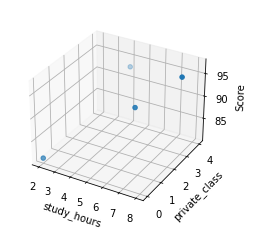

epoch=0, 기울기1=18.5600,기울기2=8.4500 절편=3.6200
epoch=100, 기울기1=7.2994,기울기2=4.2867 절편=38.0427
epoch=200, 기울기1=4.5683,기울기2=3.3451 절편=56.7901
epoch=300, 기울기1=3.1235,기울기2=2.8463 절편=66.7100
epoch=400, 기울기1=2.3591,기울기2=2.5823 절편=71.9589
epoch=500, 기울기1=1.9546,기울기2=2.4427 절편=74.7362
epoch=600, 기울기1=1.7405,기울기2=2.3688 절편=76.2058
epoch=700, 기울기1=1.6273,기울기2=2.3297 절편=76.9833
epoch=800, 기울기1=1.5673,기울기2=2.3090 절편=77.3948
epoch=900, 기울기1=1.5356,기울기2=2.2980 절편=77.6125
epoch=1000, 기울기1=1.5189,기울기2=2.2922 절편=77.7277
epoch=1100, 기울기1=1.5100,기울기2=2.2892 절편=77.7886
epoch=1200, 기울기1=1.5053,기울기2=2.2875 절편=77.8209
epoch=1300, 기울기1=1.5028,기울기2=2.2867 절편=77.8380
epoch=1400, 기울기1=1.5015,기울기2=2.2862 절편=77.8470
epoch=1500, 기울기1=1.5008,기울기2=2.2860 절편=77.8518
epoch=1600, 기울기1=1.5004,기울기2=2.2859 절편=77.8543
epoch=1700, 기울기1=1.5002,기울기2=2.2858 절편=77.8556
epoch=1800, 기울기1=1.5001,기울기2=2.2858 절편=77.8563
epoch=1900, 기울기1=1.5001,기울기2=2.2857 절편=77.8567
epoch=2000, 기울기1=1.5000,기울기2=2.2857 절편=77.8569


In [6]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d # 3d 그래프 그리는 라이브러리 가져오기

# 공부 시간 X와 성적 Y의 리스트 만들기
data = [[2,0,81],[4,4,93],[6,2,91],[8,3,97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

# 그래프로 확인
ax = plt.axes(projection="3d") # 그래프 유형 정하기
ax.set_xlabel("study_hours")
ax.set_ylabel("private_class")
ax.set_zlabel("Score")
ax.dist = 11
ax.scatter(x1,x2,y)
plt.show();

# 리스트로 되어 있는 x와 y 값을 넘파이 배열로 바꾸기(인덱스를 주어 하나씩 불러와 계산이 가능하게 하기 위함)
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

# 기울기 a와 절편 b의 값 초기화
a1 = 0
a2 = 0
b = 0

# 학습률 정하기
lr = 0.02

# 몇 번 반복될지 설정
epochs = 2001

# 경사 하강법 시작
for i in range(epochs):      # epochs 수만큼 반복
    y_pred = a1 * x1_data + a2 * x2_data + b  # y를 구하는 식 세우기
    error = y_data - y_pred  # 실제값 - 예측값, 즉 오차를 구하는 식
    # 오차함수를 a1로 미분한 결과
    a1_diff = -(2/len(x1_data)) * sum(x1_data * (error))
    # 오차함수를 a2로 미분한 결과
    a2_diff = -(2/len(x2_data)) * sum(x2_data * (error))
    # 오차함수를 b로 미분한 결과
    b_diff = -(2/len(x1_data)) * sum(y_data - y_pred)


    a1 = a1 - lr * a1_diff # 미분 결과에 학습률을 곱한 후 기존의 a1 값을 업데이트
    a2 = a2 - lr * a2_diff # 미분 결과에 학습률을 곱한 후 기존의 a2 값을 업데이트
    b = b - lr * b_diff # 미분 결과에 학습률을 곱한 후 기존의 b 값을 업데이트

    if i % 100 == 0:    # 100번 반복될 때마다 현재의 a값, b값 출력
        print("epoch=%.f, 기울기1=%.04f,기울기2=%.04f 절편=%.04f"% (i, a1, a2, b))

# # 앞서 구한 기울기와 절편을 이용해 그래프를 다시 그리기
# y_pred = a1 * x1_data + a2 * x2_data + b
# ax.scatter(x1,x2,y)
# plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
# plt.show();
